# Karaoke Recommender

### DATA DICTIONARY

id (string)
>The Spotify ID for the track.

acousticness (float)
>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

analysis_url (string)	
>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.

danceability (float)	
>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

duration_ms (int)	
>The duration of the track in milliseconds.

energy (float)	
>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness (float)
>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key (int)	
>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

liveness (float)
>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness (float)
>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode (int)	
>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness (float)	
>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo (float)	
>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
time_signature	int	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

track_href (string)	
>A link to the Web API endpoint providing full details of the track.

type (string)	
>The object type: "audio_features"

valence	(float)	
>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

GET A LIST OF SONGS AND ARTISTS

import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import numpy as np

In [3]:
# import CSV of Top Karaoke Songs
tks = pd.read_excel('/Users/andrewjeong/Downloads/karaoke_capstone/TopKaraokeSongs.xlsx')
tks.head()

,Title,Artist
0,Let It Go,Frozen
1,Happy,Pharrell Williams
2,Uptown Funk,Mark Ronson feat. Bruno Mars
3,Shake It off,Taylor Swift
4,All About That Bass,Meghan Trainor


USE TABLE TO GET SPOTIFY ID & POPULARITY

In [4]:
# Import Spotipy (Spotify Wrapper) and fuction returning spotify ID using artist and track
import spotipy
sp = spotipy.Spotify()

def extract_id(artist, title):
    results = sp.search(q=artist+" "+title) 
    for i, t in enumerate(results['tracks']['items']):
        return t['id']

In [5]:
# Create function returning spotify ID using artist and track
def extract_pop(artist, title):
    results = sp.search(q=artist+" "+title) 
    for i, t in enumerate(results['tracks']['items']):
        return t['popularity']

In [6]:
# create list of spotify ID's
ids = []
for x in tks.index:
    ids.append(extract_id(tks["Artist"][x], tks["Title"][x]))
ids=np.array(ids)

In [7]:
# create list of spotify song popularity
pop = []
for x in tks.index:
    pop.append(extract_pop(tks["Artist"][x], tks["Title"][x]))
pop = np.array(pop)

In [8]:
# Add column id in tks
tks['id'] = ids

In [49]:
tks['id'].tail()

95    1VdZ0vKfR5jneCmWIUAMxK
96    4oGTdOClZUxcM2H3UmXlwL
97    7lebqBYQIHn7qr5KEW9vdy
98    6xB8Azr9NG9xtdRm97HhbZ
99    5umfebKl2Mcqe8HbnUIRhg
Name: id, dtype: object

In [9]:
# Add column popularity in tks
tks['popularity'] = pop

In [10]:
tks.head()

,Title,Artist,id,popularity
0,Let It Go,Frozen,0qcr5FMsEO85NAQjrlDRKo,65
1,Happy,Pharrell Williams,6NPVjNh8Jhru9xOmyQigds,74
2,Uptown Funk,Mark Ronson feat. Bruno Mars,5MjukdbL11ysj7TnEM2GPn,10
3,Shake It off,Taylor Swift,1j2sRZpFUzG6wPJGfRvet3,49
4,All About That Bass,Meghan Trainor,0ifSeVGUr7py5GggttDhXw,70


In [56]:
tks['id'].head()

0    0qcr5FMsEO85NAQjrlDRKo
1    6NPVjNh8Jhru9xOmyQigds
2    5MjukdbL11ysj7TnEM2GPn
3    1j2sRZpFUzG6wPJGfRvet3
4    0ifSeVGUr7py5GggttDhXw
Name: id, dtype: object

In [69]:
type(tks["id"])

pandas.core.series.Series

USE ID TO GET AUDIO FEATURES FOR EACH SONG

In [45]:
# Get features for each song in tks

from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys

client_credentials_manager = SpotifyClientCredentials(client_id='9342202d7b4640c8aa49d83b62b570ba', client_secret = '9c08dfa4279348dda0d13d410a762728')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

features = sp.audio_features(tks['id'])
features

[{u'acousticness': 0.556,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/0qcr5FMsEO85NAQjrlDRKo',
  u'danceability': 0.539,
  u'duration_ms': 223840,
  u'energy': 0.488,
  u'id': u'0qcr5FMsEO85NAQjrlDRKo',
  u'instrumentalness': 0,
  u'key': 8,
  u'liveness': 0.122,
  u'loudness': -6.864,
  u'mode': 1,
  u'speechiness': 0.0318,
  u'tempo': 137.073,
  u'time_signature': 4,
  u'track_href': u'https://api.spotify.com/v1/tracks/0qcr5FMsEO85NAQjrlDRKo',
  u'type': u'audio_features',
  u'uri': u'spotify:track:0qcr5FMsEO85NAQjrlDRKo',
  u'valence': 0.373},
 {u'acousticness': 0.286,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6NPVjNh8Jhru9xOmyQigds',
  u'danceability': 0.652,
  u'duration_ms': 233305,
  u'energy': 0.757,
  u'id': u'6NPVjNh8Jhru9xOmyQigds',
  u'instrumentalness': 0,
  u'key': 1,
  u'liveness': 0.0886,
  u'loudness': -6.819,
  u'mode': 1,
  u'speechiness': 0.153,
  u'tempo': 159.911,
  u'time_signature': 4,
  u'track_href': u'https://api.spotif

CONVERT & MERGE TO ONE DATAFRAME

In [12]:
# convert features to dataframe
af = pd.DataFrame(features)

In [13]:
af.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.5560,https://api.spotify.com/v1/audio-analysis/0qcr...,0.539,223840,0.488,0qcr5FMsEO85NAQjrlDRKo,0.000000,8,0.1220,-6.864,1,0.0318,137.073,4,https://api.spotify.com/v1/tracks/0qcr5FMsEO85...,audio_features,spotify:track:0qcr5FMsEO85NAQjrlDRKo,0.373
1,0.2860,https://api.spotify.com/v1/audio-analysis/6NPV...,0.652,233305,0.757,6NPVjNh8Jhru9xOmyQigds,0.000000,1,0.0886,-6.819,1,0.1530,159.911,4,https://api.spotify.com/v1/tracks/6NPVjNh8Jhru...,audio_features,spotify:track:6NPVjNh8Jhru9xOmyQigds,0.962
2,0.0417,https://api.spotify.com/v1/audio-analysis/5Mju...,0.823,271360,0.498,5MjukdbL11ysj7TnEM2GPn,0.000000,0,0.1070,-7.257,1,0.1020,115.046,4,https://api.spotify.com/v1/tracks/5MjukdbL11ys...,audio_features,spotify:track:5MjukdbL11ysj7TnEM2GPn,0.638
3,0.0031,https://api.spotify.com/v1/audio-analysis/1j2s...,0.598,217602,0.909,1j2sRZpFUzG6wPJGfRvet3,0.004990,6,0.0734,-4.686,1,0.0559,160.046,4,https://api.spotify.com/v1/tracks/1j2sRZpFUzG6...,audio_features,spotify:track:1j2sRZpFUzG6wPJGfRvet3,0.966
4,0.0476,https://api.spotify.com/v1/audio-analysis/0ifS...,0.811,188754,0.879,0ifSeVGUr7py5GggttDhXw,0.000002,9,0.1090,-3.724,1,0.0514,134.064,4,https://api.spotify.com/v1/tracks/0ifSeVGUr7py...,audio_features,spotify:track:0ifSeVGUr7py5GggttDhXw,0.962


In [14]:
# Join dataframe tks (karaoke songs) and dataframe features on id
af = pd.merge(tks,af, on=['id','id'])

In [15]:
af.head()

,Title,Artist,id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Let It Go,Frozen,0qcr5FMsEO85NAQjrlDRKo,65,0.5560,https://api.spotify.com/v1/audio-analysis/0qcr...,0.539,223840,0.488,0.000000,...,0.1220,-6.864,1,0.0318,137.073,4,https://api.spotify.com/v1/tracks/0qcr5FMsEO85...,audio_features,spotify:track:0qcr5FMsEO85NAQjrlDRKo,0.373
1,Happy,Pharrell Williams,6NPVjNh8Jhru9xOmyQigds,74,0.2860,https://api.spotify.com/v1/audio-analysis/6NPV...,0.652,233305,0.757,0.000000,...,0.0886,-6.819,1,0.1530,159.911,4,https://api.spotify.com/v1/tracks/6NPVjNh8Jhru...,audio_features,spotify:track:6NPVjNh8Jhru9xOmyQigds,0.962
2,Uptown Funk,Mark Ronson feat. Bruno Mars,5MjukdbL11ysj7TnEM2GPn,10,0.0417,https://api.spotify.com/v1/audio-analysis/5Mju...,0.823,271360,0.498,0.000000,...,0.1070,-7.257,1,0.1020,115.046,4,https://api.spotify.com/v1/tracks/5MjukdbL11ys...,audio_features,spotify:track:5MjukdbL11ysj7TnEM2GPn,0.638
3,Shake It off,Taylor Swift,1j2sRZpFUzG6wPJGfRvet3,49,0.0031,https://api.spotify.com/v1/audio-analysis/1j2s...,0.598,217602,0.909,0.004990,...,0.0734,-4.686,1,0.0559,160.046,4,https://api.spotify.com/v1/tracks/1j2sRZpFUzG6...,audio_features,spotify:track:1j2sRZpFUzG6wPJGfRvet3,0.966
4,All About That Bass,Meghan Trainor,0ifSeVGUr7py5GggttDhXw,70,0.0476,https://api.spotify.com/v1/audio-analysis/0ifS...,0.811,188754,0.879,0.000002,...,0.1090,-3.724,1,0.0514,134.064,4,https://api.spotify.com/v1/tracks/0ifSeVGUr7py...,audio_features,spotify:track:0ifSeVGUr7py5GggttDhXw,0.962


In [16]:
# pickle dataframe
import pickle

with open('karaoke_songs.pkl', 'w') as ks:
    pickle.dump(af, ks)

In [17]:
# open pickled dataframe
with open('karaoke_songs.pkl', 'r') as ks:
    af = pickle.load(ks)

In [18]:
# strip spaces
af['Title'] = af['Title'].str.strip()
af['Artist'] = af['Artist'].str.strip()

In [19]:
# check unique values for column 'type'
af['type'].unique()

array([u'audio_features'], dtype=object)

In [20]:
# check unique values for column 'mode'
af['mode'].unique()

array([1, 0])

In [21]:
# drop columns ('analysis_url','track_href','type','uri')
af.drop(['analysis_url','track_href','type','uri'],axis=1,inplace=True)

In [22]:
# check types for columns
af.dtypes

Title                object
Artist               object
id                   object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [23]:
# Check for nulls
af[pd.isnull(af).any(axis=1)]

,Title,Artist,id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


## Exploratory Data Analysis (EDA)

In [24]:
# Describe audio features 
af.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,55.950000,0.366519,0.579370,226366.950000,0.558239,0.072005,5.150000,0.165012,-8.721850,0.820000,0.063289,120.36296,3.930000,0.545690
std,22.462258,0.321266,0.168835,58064.650249,0.234991,0.228192,3.505767,0.121230,4.252458,0.386123,0.061216,29.71179,0.408372,0.244456
min,0.000000,0.000453,0.225000,68453.000000,0.068500,0.000000,0.000000,0.056400,-19.885000,0.000000,0.025100,66.98000,1.000000,0.108000
25%,52.750000,0.047300,0.462750,194967.000000,0.374750,0.000000,2.000000,0.089275,-10.974750,1.000000,0.032350,99.60575,4.000000,0.346500
50%,63.000000,0.281500,0.560000,219486.500000,0.588000,0.000006,5.000000,0.115000,-7.517000,1.000000,0.042350,119.03200,4.000000,0.552500
75%,70.000000,0.635250,0.730750,255210.250000,0.774000,0.000308,8.000000,0.186250,-5.839500,1.000000,0.059650,132.88725,4.000000,0.763250
max,84.000000,0.938000,0.978000,515867.000000,0.939000,0.966000,11.000000,0.680000,-2.451000,1.000000,0.453000,213.84000,5.000000,1.000000


In [25]:
# Correlation between various features
af_corr = af.corr()
af_corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
popularity,1.000000,0.063085,-0.229587,0.150240,0.135791,-0.620441,-0.052880,-0.004619,0.231963,0.287779,-0.026219,0.158122,0.099821,-0.208457
acousticness,0.063085,1.000000,-0.383894,-0.000330,-0.737143,-0.055433,-0.004607,0.050868,-0.569901,0.106390,0.063786,-0.092540,-0.276298,-0.304459
danceability,-0.229587,-0.383894,1.000000,-0.124491,0.354451,0.123216,-0.061650,-0.127623,0.241624,-0.187226,0.178841,-0.114979,0.128276,0.590422
duration_ms,0.150240,-0.000330,-0.124491,1.000000,0.015339,0.040852,0.060252,-0.143532,-0.045294,0.007464,-0.137775,0.038121,0.051889,-0.221704
energy,0.135791,-0.737143,0.354451,0.015339,1.000000,-0.149511,-0.018442,0.045384,0.776942,-0.114073,0.040449,0.126233,0.220904,0.386705
instrumentalness,-0.620441,-0.055433,0.123216,0.040852,-0.149511,1.000000,0.142364,-0.128766,-0.315536,-0.195259,-0.025719,-0.153162,0.054550,0.126051
key,-0.052880,-0.004607,-0.061650,0.060252,-0.018442,0.142364,1.000000,0.064176,-0.084283,-0.039549,-0.098231,-0.133387,-0.119590,-0.021844
liveness,-0.004619,0.050868,-0.127623,-0.143532,0.045384,-0.128766,0.064176,1.000000,-0.007868,0.009433,0.106527,0.025675,-0.326434,0.068489
loudness,0.231963,-0.569901,0.241624,-0.045294,0.776942,-0.315536,-0.084283,-0.007868,1.000000,-0.018051,-0.031666,-0.028151,0.212853,0.101458
mode,0.287779,0.106390,-0.187226,0.007464,-0.114073,-0.195259,-0.039549,0.009433,-0.018051,1.000000,-0.156919,0.098497,0.175523,-0.095518


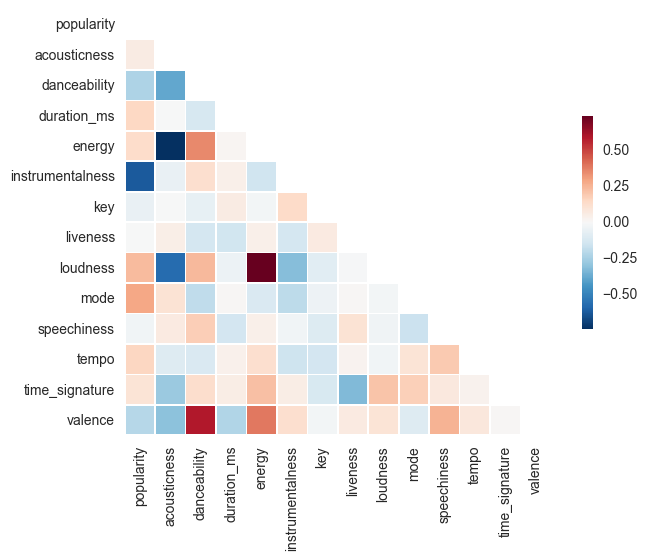

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(af_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(af_corr, mask=mask, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

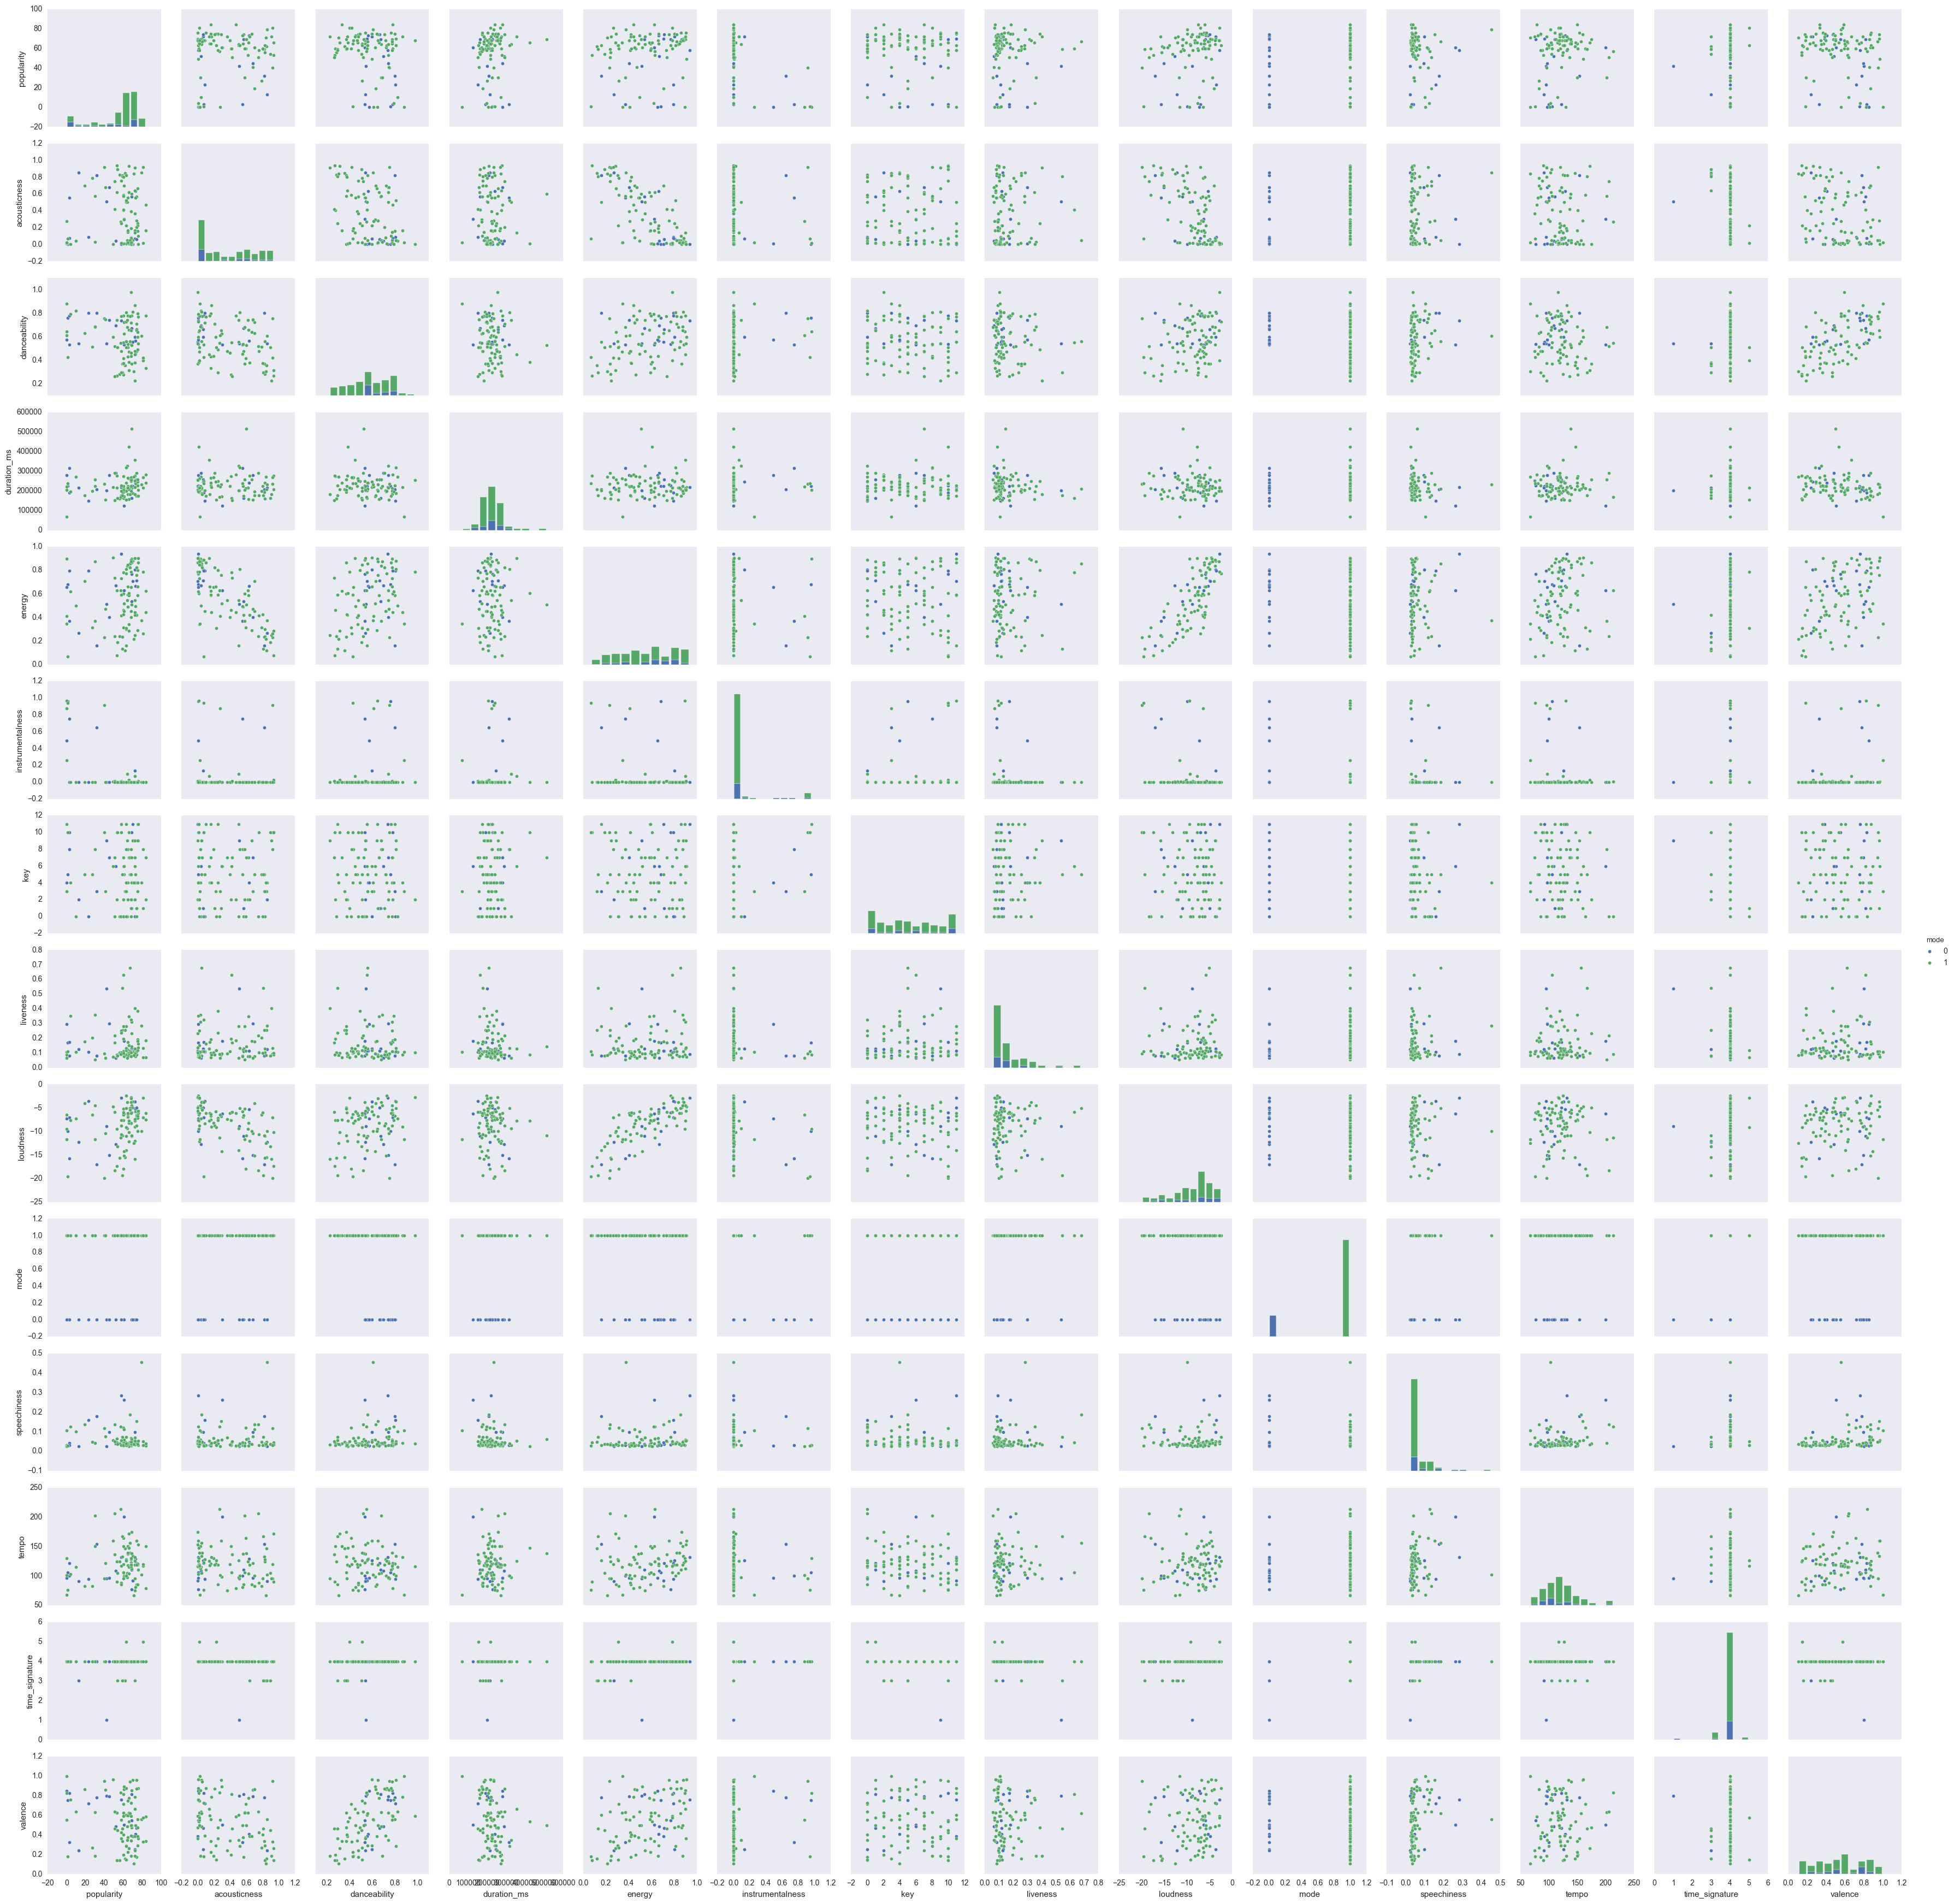

In [27]:
sns.set(style="dark")
sns.pairplot(af, hue='mode');

In [28]:
afe = af[['Title','energy']].sort_values('energy', ascending = False).head(10)
afe

,Title,energy
54,Gangnam Style,0.939
3,Shake It off,0.909
81,Sex On Fire,0.905
76,Sweet Child O' Mine,0.901
16,Black Magic,0.898
31,Timber,0.896
32,Livin' On A Prayer,0.887
4,All About That Bass,0.879
71,Best Song Ever,0.877
29,Bang Bang,0.874


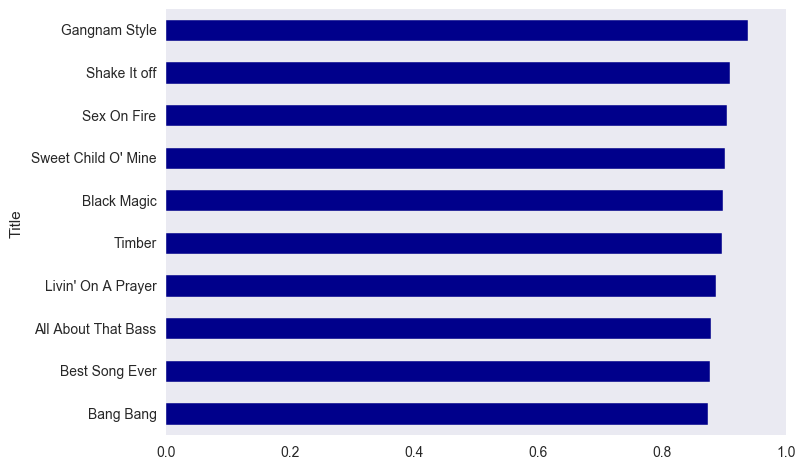

In [29]:
fig, ax = plt.subplots()
afe.plot(kind='barh', x='Title',y='energy', color='darkblue', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

In [30]:
afd = af[['Title','danceability']].sort_values('danceability', ascending = False).head(10)
afd

,Title,danceability
66,Ice Ice Baby,0.978
62,Twinkle Twinkle Little Star,0.881
46,I'm Gonna Be (500 Miles),0.867
2,Uptown Funk,0.823
4,All About That Bass,0.811
91,Man In The Mirror,0.808
72,Fancy,0.804
82,I Knew You Were Trouble,0.801
11,Rather Be,0.799
90,Problem,0.791


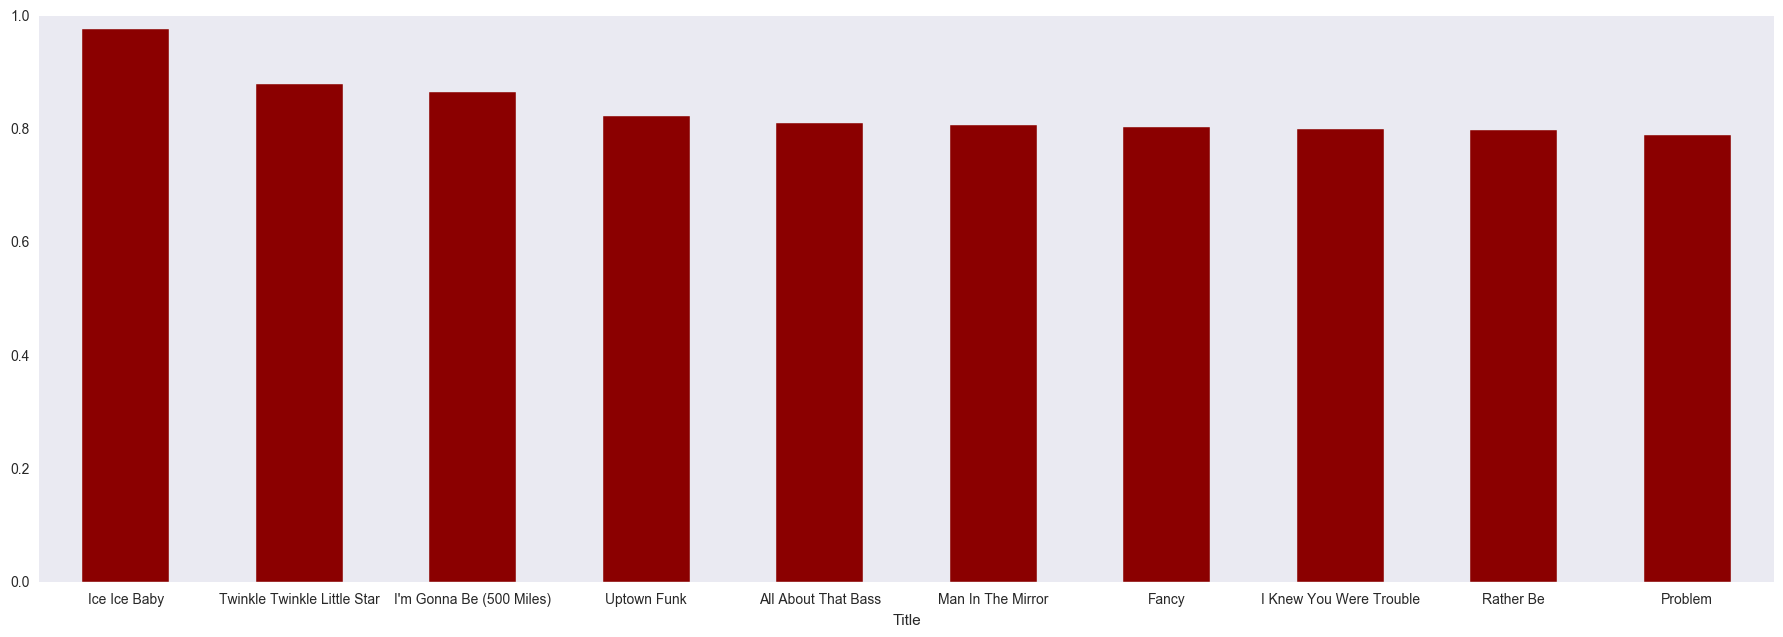

In [31]:
fig, ax = plt.subplots()
afd.plot(kind='bar', x='Title',y='danceability', color='darkred', ax=ax, legend=False, figsize=(18,8))
plt.tight_layout()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=360);

In [32]:
af[af['Title']=='Twinkle Twinkle Little Star']

,Title,Artist,id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
62,Twinkle Twinkle Little Star,Kids Karaoke,0Z1Xwo1AJ5pysbWdyZzlfa,0,0.0245,0.881,68453,0.348,0.257,3,0.106,-11.639,1,0.105,67.496,4,1.0


In [33]:
aft = af[['Title','tempo']].sort_values('tempo', ascending = False).head(10)
aft

,Title,tempo
78,You're The One That I Want,213.840
65,The Bare Necessities,205.755
15,Islands In The Stream,202.074
36,Love Is An Open Door,200.088
17,Wonderwall,174.530
51,Somewhere Only We Know,172.021
79,Can You Feel the Love Tonight,166.765
22,Hakuna Matata,164.565
3,Shake It off,160.046
1,Happy,159.911


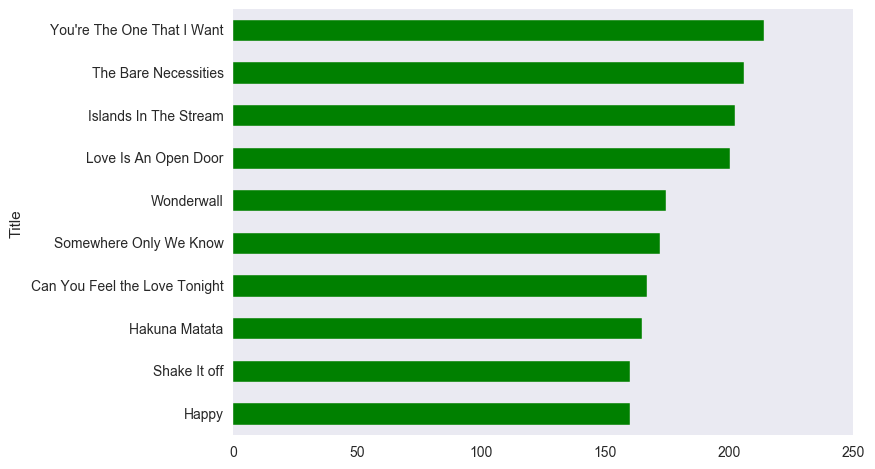

In [34]:
fig, ax = plt.subplots()
aft.plot(kind='barh', x='Title',y='tempo', color='green', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

# Data Mining

In [35]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder

In [36]:
af.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Title,Let It Go,Happy,Uptown Funk,Shake It off,All About That Bass,Thinking Out Loud,Blank Space,Stay With Me,Do You Want To Build A Snowman?,Summer Nights,...,Problem,Man In The Mirror,I Will Always Love You,I Wanna Be Like You,Diamonds,The A Team,Ironic,Hallelujah,I Know Him So Well,Tujhe Dekha Toh Yeh Jana Sanam
Artist,Frozen,Pharrell Williams,Mark Ronson feat. Bruno Mars,Taylor Swift,Meghan Trainor,Ed Sheeran,Taylor Swift,Sam Smith,Frozen,Grease,...,Ariana Grande feat. Iggy Azalea,Michael Jackson,Whitney Houston,The Jungle Book,Rihanna,Ed Sheeran,Alanis Morissette,Alexandra Burke,Elaine Paige & Barbara Dickson,Kumar Sanu & Lata Mangeshkar
id,0qcr5FMsEO85NAQjrlDRKo,6NPVjNh8Jhru9xOmyQigds,5MjukdbL11ysj7TnEM2GPn,1j2sRZpFUzG6wPJGfRvet3,0ifSeVGUr7py5GggttDhXw,34gCuhDGsG4bRPIf9bb02f,2muXrVYHVCUOuth8MePP3K,5Db9VIdDsN5yu3Eu7CT0i4,2yi7HZrBOC4bMUSTcs4VK6,0ej0YkMM8E0WOWuWVZliDh,...,0iWtof25vGGb4rythjoGUS,1kiNatIrwDusOZfR29W0LJ,4eHbdreAnSOrDDsFfc4Fpm,2EeVPGHq2I7fjeDfT6LEYX,7Kt59L2ZZGtOnIhvMwzG6f,1VdZ0vKfR5jneCmWIUAMxK,4oGTdOClZUxcM2H3UmXlwL,7lebqBYQIHn7qr5KEW9vdy,6xB8Azr9NG9xtdRm97HhbZ,5umfebKl2Mcqe8HbnUIRhg
popularity,65,74,10,49,70,84,40,74,62,53,...,4,63,71,45,70,75,58,13,1,0
acousticness,0.556,0.286,0.0417,0.0031,0.0476,0.474,0.921,0.568,0.85,0.622,...,0.00436,0.52,0.844,0.68,0.00118,0.669,0.25,0.856,0.071,0.00966
danceability,0.539,0.652,0.823,0.598,0.811,0.781,0.754,0.479,0.359,0.741,...,0.791,0.808,0.306,0.741,0.555,0.642,0.295,0.541,0.429,0.573
duration_ms,223840,233305,271360,217602,188754,281560,235052,172724,206507,216907,...,196206,318680,271093,279453,225147,258373,225933,215249,239093,279641
energy,0.488,0.757,0.498,0.909,0.879,0.445,0.232,0.419,0.121,0.631,...,0.621,0.812,0.214,0.404,0.709,0.289,0.593,0.268,0.0685,0.657
instrumentalness,0,0,0,0.00499,1.91e-06,0,0.915,0.000217,0.00028,7.1e-05,...,3.88e-05,7.91e-05,5.3e-06,0.000119,0,0,0,0.000222,0.943,0.492
key,8,1,0,6,9,2,10,0,3,2,...,4,8,4,7,11,9,11,2,10,4


In [37]:
x = af.iloc[:,4:]
X = StandardScaler().fit_transform(x)

In [38]:
af_norm = pd.DataFrame(X, columns=[x.columns])

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

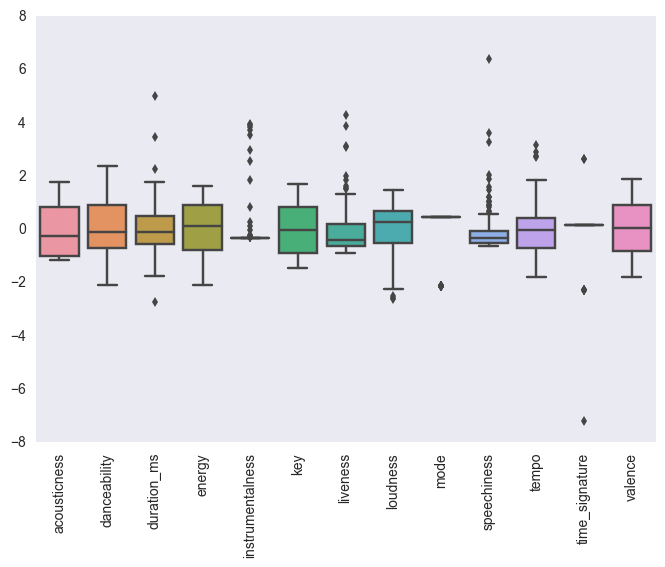

In [39]:
sns.boxplot(af_norm)
plt.xticks(rotation=90) 

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [41]:
pca.explained_variance_ratio_

array([ 0.22858801,  0.13104887,  0.11693154,  0.10332687,  0.08101559,
        0.07383328,  0.06237532,  0.05778152,  0.05410829,  0.03283288])

In [62]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics

In [63]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [65]:
centroids

array([[-0.49919182,  0.57207189, -0.19241745,  0.62978446, -0.2754441 ,
        -0.13495656,  0.05525793,  0.45475048, -0.12081366,  0.24666641,
         0.03996353,  0.21871144,  0.4577866 ],
       [ 0.6989451 , -0.84978626,  0.20944486, -0.74724756, -0.30044246,
         0.08931224, -0.00617905, -0.40306655,  0.33503944, -0.32039003,
         0.03469058, -0.33256188, -0.71198746],
       [-0.10021159,  0.35273175,  0.25372187, -0.5294902 ,  3.28947415,
         0.45869003, -0.33596091, -1.04777252, -0.83292673, -0.07226352,
        -0.433875  ,  0.17227589,  0.43810266]])

In [66]:
inertia

988.60812377209959

In [67]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.16756658050089698